# Project 3 - Jacob Kozera

The purpose of this code is to generate a random configuration of spin-1/2 particles in a 20x20 lattice, then use a Monte Carlo simulation to converge on the lowest energy configuration of said lattice. In order to converge on this configuration, we will employ the Ising Model, which gives us the mathematical basis through which particles in our lattice will interact. The energy of a group of adjacent particles in the lattice is given by:

$$ E = - J \sum{s_i*s_j}$$

Where J is the coupling constant, and the s variables represent the spin states of the particles. We start by applying this calculation to a random point in the lattice. We then flip the state of the particle at the center of our selection, and re-calculate the energy. If the difference between these two energies is zero or negative, we will accept the new configuration with the flipped state. If this difference is positive however, the following calculation is required.

$$ w = e^{-(\beta\delta{E})}$$

We then compare this result with a random float between 0 and 1 and make the following determination:

Accept the new configuration if $$ r \leq w $$
Revert to old configuration if $$ r > w $$

We will start by iterating 1000 times in this program, and will further discuss convergence criteria after the code completes. The simulation should be considered complete once the necessary energy changes are too consistantly high to reliably change more states in the lattice.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

Red Dots = -1, Blue Dots = 1


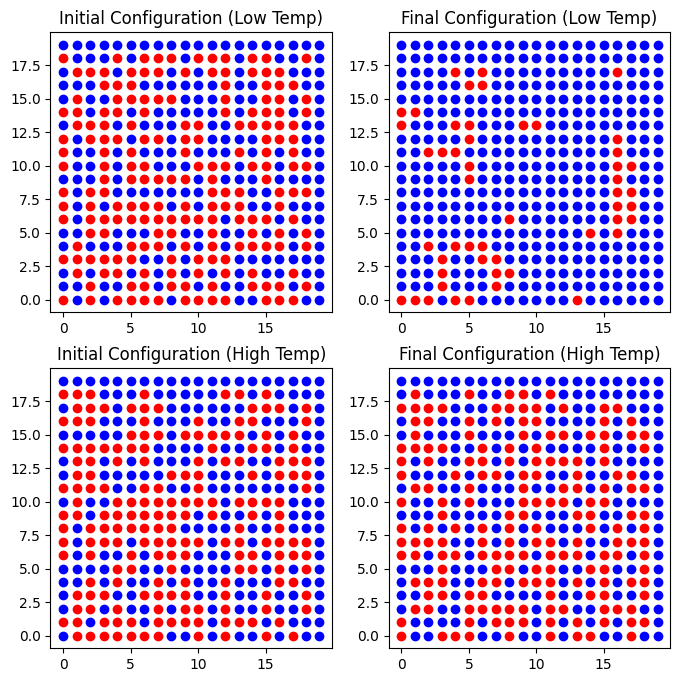

In [28]:
N = 20
J = 1 # Coupling Constant
k = 1 # Boltzmann Constant
T = 1 # Temperature

spins = np.ones((N,N))

# Function which generates the random lattice
def random_lattice(matrix):
    for i in range(len(matrix)-1):
        for j in range(len(matrix)-1):
            # Picks a float between 0 and 1
            random_val = random.random()
            if random_val > 0.5 and random_val <= 1:
                matrix[i,j] = -1
            elif random_val > 0 and random_val <= 0.5:
                matrix[i,j] = 1
            else:
                print("error: random value out of bounds")
                break
    #print(matrix)
    return matrix

# Not sure what the technical term for this fucntion is called, its from Morten's lecture notes found in the references
# Used to check against certain random values in the main algorithm
def w_func(energy, k, T):
    beta = 1/(k*T)
    return np.exp(-(beta*energy))

# Main function
def calc_energy(matrix, J, initial_energy):

    # Generate some randome values and establish the bounds of the matrix
    rand_x = random.randrange(len(matrix)-1)
    rand_y = random.randrange(len(matrix)-1)
    maxlen = len(matrix)-1
    minlen = 0
    
    # Checks and calculations depending on the position of the matrix
    if rand_x == maxlen and rand_y == maxlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x-1,rand_y] + matrix[rand_x,rand_y-1])
    elif rand_x == maxlen and rand_y == minlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x-1,rand_y] + matrix[rand_x,rand_y+1])
    elif rand_x == minlen and rand_y == maxlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x+1,rand_y] + matrix[rand_x,rand_y-1])
    elif rand_x == minlen and rand_y == minlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x+1,rand_y] + matrix[rand_x,rand_y+1])
    elif rand_x == maxlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x-1,rand_y] + matrix[rand_x,rand_y-1] + matrix[rand_x, rand_y+1])
    elif rand_x == minlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x+1,rand_y] + matrix[rand_x,rand_y-1] + matrix[rand_x, rand_y+1])
    elif rand_y == maxlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x-1,rand_y] + matrix[rand_x+1,rand_y] + matrix[rand_x, rand_y-1])
    elif rand_y == minlen:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x-1,rand_y] + matrix[rand_x+1,rand_y] + matrix[rand_x, rand_y+1])
    else:
        energy = matrix[rand_x,rand_y] * (matrix[rand_x+1,rand_y] + matrix[rand_x,rand_y+1] + matrix[rand_x-1,rand_y] + matrix[rand_x,rand_y-1])

    # Complete energy calculation
    old_energy = -J * energy

    # Copy old configuration
    old_config = matrix.copy()

    # Flip the spin
    if matrix[rand_x,rand_y] == 1:
        matrix[rand_x,rand_y] = -1
    elif matrix[rand_x,rand_y] == -1:
        matrix[rand_x,rand_y] = 1
    else:
        print("error: invalid spin value")

    # Calculate new energy and delta energy
    new_energy = old_energy * matrix[rand_x,rand_y]
    delta_energy = new_energy - old_energy
    #print("Delta E =",delta_energy)

    # Check delta energy, keep new configuration or revert
    if delta_energy <= 0:
        #print("delta E equal to or less than zero, new configuration accepted")
        final_energy = initial_energy + delta_energy
    else:
        #print("delta E greater than zero, running w_func")
        w = w_func(delta_energy, k, T)
        r = random.random()
        if r <= w:
            #print("random greater than w, new configuration accepted")
            final_energy = initial_energy + delta_energy
        else:
            #print("random less than w, return to old configuration")
            final_energy = initial_energy
            matrix = old_config.copy()
        
    
    return matrix, final_energy

# Everything below this is just plotting and running the functions above

print("Red Dots = -1, Blue Dots = 1")
plt.figure(figsize=[8,8])
plt.subplot(2,2,1)
plt.title("Initial Configuration (Low Temp)")
S = random_lattice(spins)
for i in range(len(S)):
    for j in range(len(S)):
        if S[i, j] == 1:
            plt.scatter(j, i, color='blue', marker='o')
        else:
            plt.scatter(j, i, color='red', marker='o')


epsilon = 10**-10
num_cycles = 0
initial_energy = np.sum(S)
energies = [initial_energy]
old_avg = 100
new_avg = 1

# This is where I tried to add the convergence check based on the average energy, see discussion below.
# I still believe this would work, my implementation was just incorrect
#while old_avg-new_avg > epsilon:
for i in range(1000):
#    if num_cycles == 0:
#        pass
#    else:
#        old_avg = new_avg
    S, new_energy = calc_energy(S, J, initial_energy)
    energies.append(new_energy)
#    new_avg = sum(energies)/len(energies)
    initial_energy = new_energy

    num_cycles += 1


#print(np.array(energies))
#print(S)
plt.subplot(2,2,2)
plt.title("Final Configuration (Low Temp)")
for i in range(len(S)):
    for j in range(len(S)):
        if S[i, j] == 1:
            plt.scatter(j, i, color='blue')
        else:
            plt.scatter(j, i, color='red')

T = 100

plt.subplot(2,2,3)
plt.title("Initial Configuration (High Temp)")
S2 = random_lattice(spins)
for i in range(len(S2)):
    for j in range(len(S2)):
        if S2[i, j] == 1:
            plt.scatter(j, i, color='blue', marker='o')
        else:
            plt.scatter(j, i, color='red', marker='o')

initial_energy2 = np.sum(S2)
energies2 = [initial_energy2]

for i in range(1000):
    S2, new_energy = calc_energy(S2, J, initial_energy2)
    energies2.append(new_energy)
    initial_energy = new_energy

    num_cycles += 1

plt.subplot(2,2,4)
plt.title("Final Configuration (High Temp)")
for i in range(len(S2)):
    for j in range(len(S2)):
        if S2[i, j] == 1:
            plt.scatter(j, i, color='blue')
        else:
            plt.scatter(j, i, color='red')

Due to time constraints and the incomplete state of the algorithm, this discussion will be unfortunatly limited.

I tried to implement a convergence test into this algorithm, one in which once the change in average energy became sufficiently low, the simulation would end. Unfortunately, I was unable to get this convergence test to work, but it remains in the code commented out. Instead, I simply iterate the simulation 1000 times. This seems like a semi-reliable way of converging on a solution, but due to the random nature of the algorithm, its likely there will be instances where the simulation does not converge on the true solution.

I was unable to find the critical temperature, in the case of the code above I believe it lies around T = 10. Physical speaking, the critical temperature should be the point in which we begin to see a phase transition between the ferromagnetic and paramagnetic phases.

# Questions

1. The Ising Model has obvious behavioral differences when starting at a high vs low temperature, mostly in the form of how the final state will present itself. In this model, when the temperature is increased, the model seems to no longer converge on a low energy solution. Essentially, all the spins seem to remain close their initial random configuration. I suppose this makes physical sense, as a higher energy system would be less able to disperse its energy, and this would correspond with the paramagnetic phase. Low energy initial conditoins however, seem to reliably produce systems in which the model can converge to a low-energy state, or where all the spins point in one direction. This corresponds to our ferromagnetic phase.

2. When the initial temperature of the system lies below the critical temperature, we experience a phenomenon where the poles of each magnet tend towards one way, this is known as spontaneous magentization. This can be seen in the upper right low temperature graph, where the all the spins tend towards 1.

3. Its difficult to discuss the behavior of the model as it reaches the critical temperture due to current limitations in the code. However, I find it likely that as you approach from T<T_c the spontaneous magetization will see an exponential drop off till eventually the configuration starts to stablize around T_c. At T=>T_c the model seems to stabilize and there isn't much spontaneous magnetization. I believe this change occurs because at a certain point, there is so much thermal energy in the system is it unable to dissipate, so we don't see much change between the initial and final configurations.

4. The main limitation I notice with the Ising model is the inability to change the temperature of the lattice while the code is running. With certain modifiations this could perhaps be done, but how would this temperature change effect the spin of points in the lattice outside the existing parameters in the model? One other limitation I believe may exist is its seemingly full reliance on classical mechanics. I'm not entirely sure if magnetic lattices like this exist at the microscopic scale, but if so it seems the quantum mechanical aspects of the system would have to be worked into the model.

References:

1. Hjorth-Jensen, M. (2015). Computational Physics - Lecture Notes Fall 2015 [Review of Computational Physics - Lecture Notes Fall 2015].

2. “Ising Model.” Wikipedia, 14 Aug. 2023, en.wikipedia.org/wiki/Ising_model#Monte_Carlo_methods_for_numerical_simulation. Accessed 15 Aug. 2023.